# STAYZE RENT PREDICTION PROJECT 

**Author: Rutuj Jagtap**  

**Problem Statement:**  
Stayze, a burgeoning real estate management company, aims to enhance its rental property management system through predictive analytics. The company seeks to develop a machine learning model that accurately forecasts rental prices for properties listed on its platform. The objective is to provide property owners and tenants with reliable rental price estimates, optimizing property occupancy rates and maximizing revenue for property owners.

By implementing an effective rental price prediction model, Stayze seeks to enhance customer satisfaction, attract more property listings, optimize revenue streams for property owners, and establish itself as a leading platform in the competitive real estate market.

In [1]:
#importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing the Database

df = pd.read_csv('D:\Tech\TMLC\RentPrediction.csv')

df

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,5728806,Large private room in Nolita,Nat,Manhattan,Nolita,40.72217,-73.99481,Private room,120,7,3,0.06,3,0
1,2243769,Super Bowl New York City Apartment,Brian,Manhattan,Upper West Side,40.80020,-73.96045,Entire home/apt,1500,1,0,NaN,1,0
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,Queens,East Elmhurst,40.75558,-73.89316,Entire home/apt,200,2,4,4.00,1,365
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Staten Island,Concord,40.60110,-74.07830,Shared room,30,2,0,NaN,4,82
4,3780951,Charming Harlem apartment,Gina,Manhattan,Harlem,40.81022,-73.94266,Shared room,115,1,16,0.27,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34221,28342248,Ridgewood retreat,Sophie,Queens,Ridgewood,40.70602,-73.90485,Entire home/apt,80,5,2,0.21,1,0
34222,8438775,Private BR & Bath near Central Park,Gabi,Manhattan,Upper West Side,40.77697,-73.97698,Private room,137,1,163,3.55,1,32
34223,27332770,Warm Home w/ Private Garden (Inwood Manhattan ...,Mary,Manhattan,Inwood,40.86912,-73.92183,Entire home/apt,195,2,6,0.53,1,0
34224,9063972,Chill Bushwick Suite,Olu Bliss,Brooklyn,Bushwick,40.69709,-73.91435,Private room,80,3,0,NaN,1,0


# Data Exploration 

In [3]:
#Checking the datatypes and non null values in the database

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34226 entries, 0 to 34225
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34214 non-null  object 
 2   host_name                       34213 non-null  object 
 3   neighbourhood_group             34226 non-null  object 
 4   neighbourhood                   34226 non-null  object 
 5   latitude                        34226 non-null  float64
 6   longitude                       34226 non-null  float64
 7   room_type                       34226 non-null  object 
 8   price                           34226 non-null  int64  
 9   minimum_nights                  34226 non-null  int64  
 10  number_of_reviews               34226 non-null  int64  
 11  reviews_per_month               27244 non-null  float64
 12  calculated_host_listings_count  

In [4]:
#Cheching the statistical data of the numerical coulmns

df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27244.000000,34226.000000,34226.000000
mean,1.898209e+07,40.729059,-73.952070,153.480979,6.953690,23.390931,1.377074,7.093905,113.301730
std,1.097597e+07,0.054604,0.046161,243.312608,20.255833,44.476822,1.688953,32.828412,131.892814
min,2.595000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.460366e+06,40.690040,-73.983150,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.965371e+07,40.722995,-73.955700,107.000000,2.000000,5.000000,0.730000,1.000000,45.000000
75%,2.908201e+07,40.763200,-73.935982,175.000000,5.000000,24.000000,2.020000,2.000000,229.000000
max,3.648724e+07,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


**From the above stats it can be observed that 'price','minimum_nights' and 'availability_365' would contain possible outliers that can decrease the efficiency of the model**

In [5]:
#Checking the count of null values in each column

df.isnull().sum()

id                                   0
name                                12
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6982
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [6]:
#Checking unique neighbourhood groups

df['neighbourhood_group'].unique()

array(['Manhattan', 'Queens', 'Staten Island', 'Brooklyn', 'Bronx'],
      dtype=object)

In [7]:
#Checking unique room types

df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [8]:
#Checking stats for price column seperately

df['price'].describe()

count    34226.000000
mean       153.480979
std        243.312608
min          0.000000
25%         69.000000
50%        107.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

# Data Cleaning

<function matplotlib.pyplot.show(close=None, block=None)>

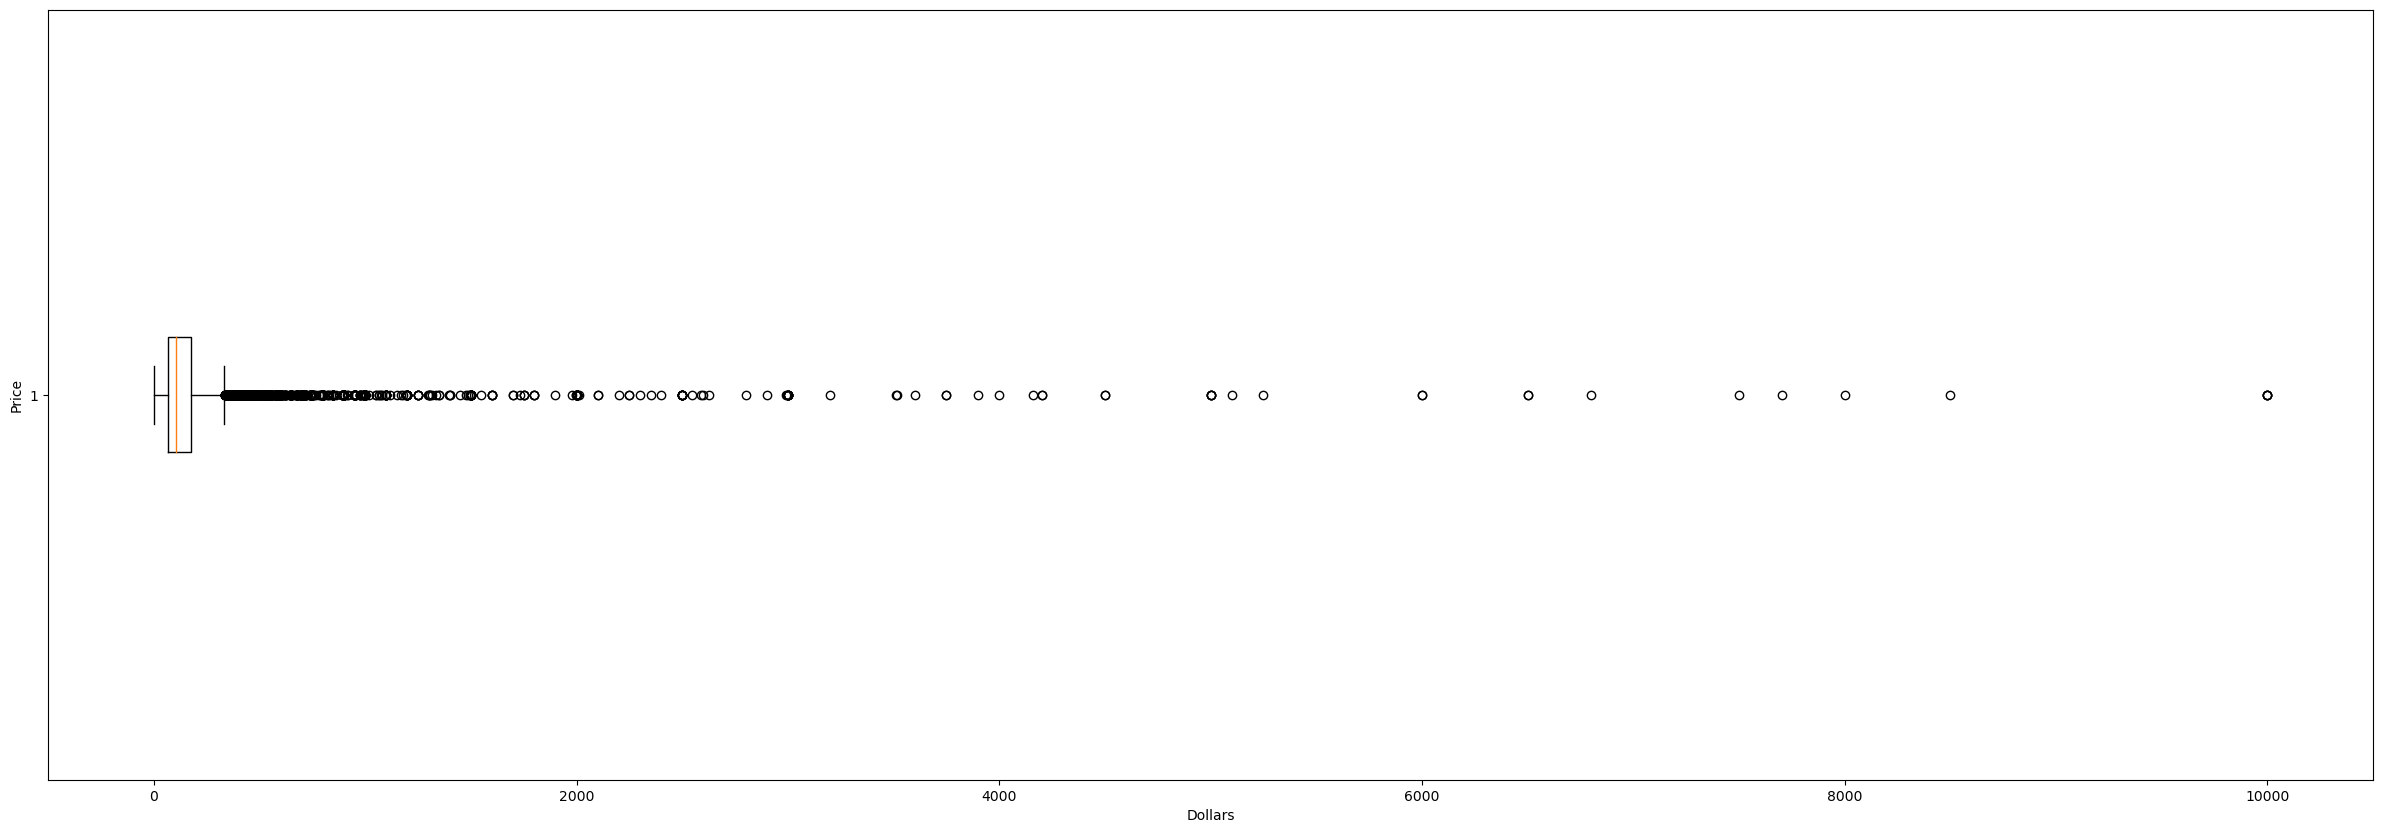

In [9]:
#Creating a Boxplot for finding outliers in Price
plt.figure(figsize = (30,10))
plt.boxplot(df['price'], vert= False)
plt.ylabel('Price')
plt.xlabel('Dollars')
plt.show

**From the above boxplot it is shown that the values in 'price' column are quite concentrated below 2000 and tend to scatter at large towards 10000. These values beyond 4000 contribute to distinct outliers and needs to be excluded. However as that would create to major data loss, setting threshold to 8000 and droping datapoints beyond that inorder to retain maximum data for efficient model building.**  

In [10]:
#Dropping rows from the database having price > 8000

df.drop(df[df['price']>8000].index, inplace=True)

**Database consists of rows with Price zero. As price cannot be zero, Price = 0 indicates either data entered by mistake or property is not open to be rented.Hence dropping row with price = 0**

In [11]:
#Counting number of values in price cloumn that are Zero

df[df['price']==0].count()

id                                9
name                              9
host_name                         9
neighbourhood_group               9
neighbourhood                     9
latitude                          9
longitude                         9
room_type                         9
price                             9
minimum_nights                    9
number_of_reviews                 9
reviews_per_month                 8
calculated_host_listings_count    9
availability_365                  9
dtype: int64

In [12]:
#Dropping rows from the database having price = 0 

df.drop(df[df['price']==0].index, inplace=True)

In [13]:
#Checking Database after deleting rows

df.sort_values(['price'], axis = 0, ascending=True)

,id,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
10766,18835820,"Quiet, Cozy UES Studio Near the Subway",Amy,Manhattan,Upper East Side,40.76844,-73.95341,Entire home/apt,10,3,10,0.39,1,0
23016,25839759,Gigantic Sunny Room in Park Slope-Private Back...,Rachel,Brooklyn,Sunset Park,40.66242,-73.99464,Entire home/apt,10,1,14,1.06,1,4
13778,28071998,Cozy room in a three-bedroom House,Arthur,Queens,Woodhaven,40.69139,-73.86086,Private room,10,7,4,0.41,2,180
1503,17437106,Couch in Harlem Harvey Refugees only,Morgan,Manhattan,Harlem,40.81302,-73.95349,Shared room,10,1,0,NaN,1,0
29613,24114389,"Very Spacious bedroom, steps from CENTRAL PARK.",Salim,Manhattan,Upper West Side,40.76844,-73.98333,Private room,10,1,2,0.13,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3754,2271504,SUPER BOWL Brooklyn Duplex Apt!!,Jonathan,Brooklyn,Clinton Hill,40.68766,-73.96439,Entire home/apt,6500,1,0,NaN,1,0
7817,33998396,3000 sq ft daylight photo studio,Kevin,Manhattan,Chelsea,40.75060,-74.00388,Entire home/apt,6800,1,0,NaN,6,364
15974,33007610,70' Luxury MotorYacht on the Hudson,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN,1,364
3719,22779726,East 72nd Townhouse by (Hidden by Airbnb),Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN,12,146


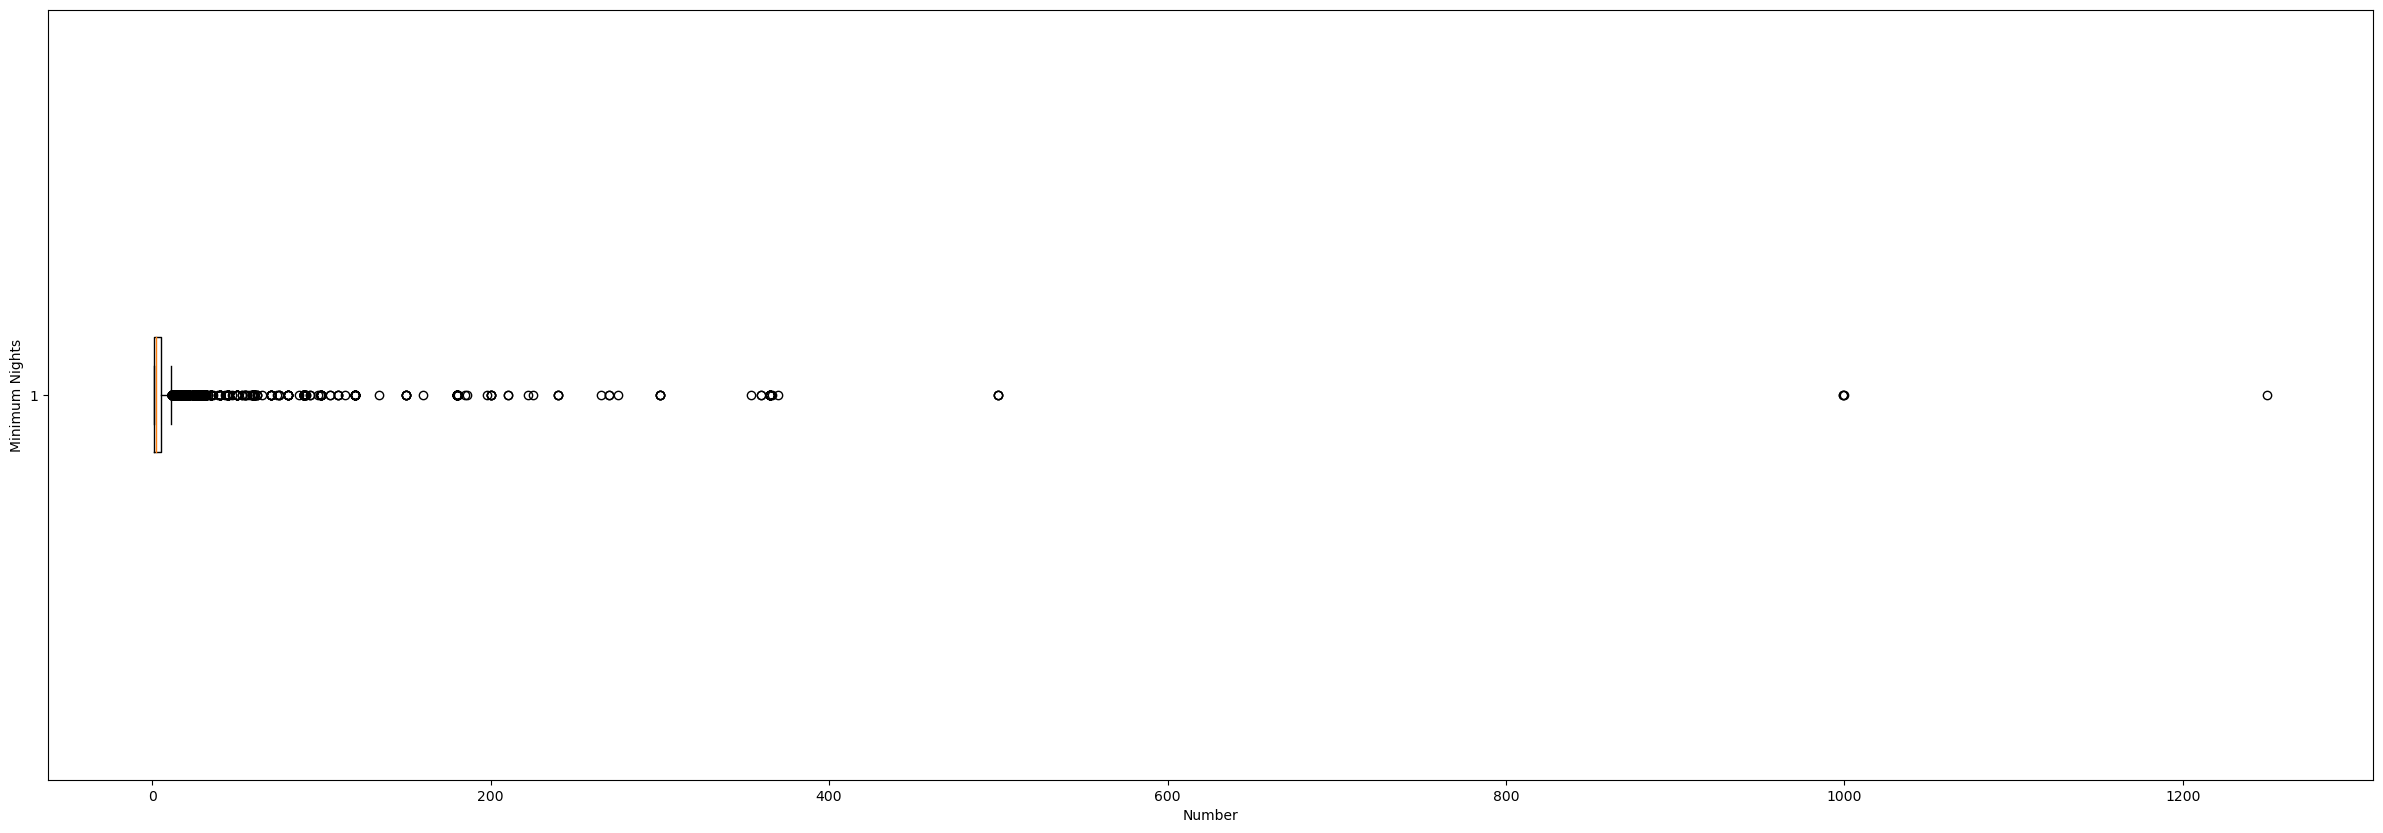

In [14]:
#Creating a Boxplot for finding outliers in Minimum nights

plt.figure(figsize=(30,10))
plt.boxplot(df['minimum_nights'], vert=False)
plt.ylabel('Minimum Nights')
plt.xlabel('Number')
plt.show()

**From the above boxplot it is shown that the values in 'minimum_nights' column are quite concentrated below 800 and tend to scatter at large towards 1200. These values beyond 800 contribute to distinct outliers and needs to be excluded. Thus droping datapoints beyond that for efficient model building.**

In [15]:
#Dropping rows of minimum_nights > 800

df.drop(df[df['minimum_nights']>800].index, inplace=True)

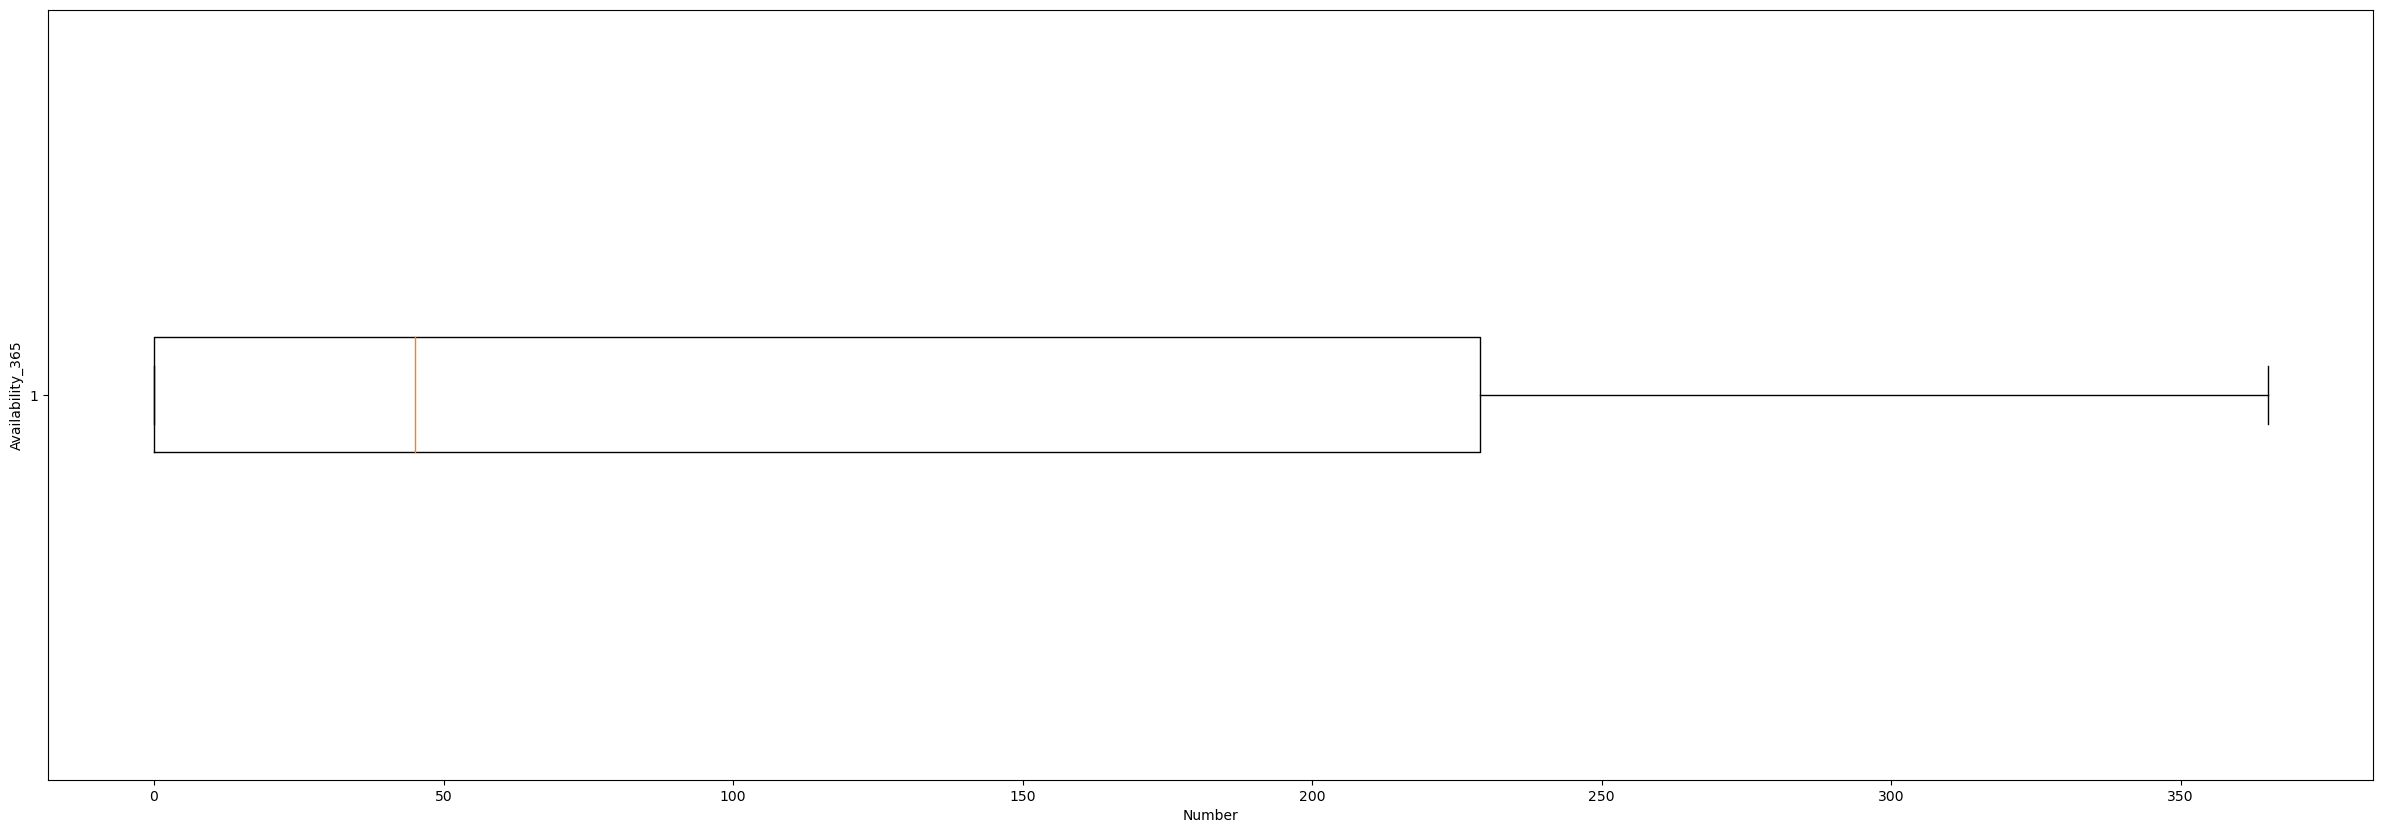

In [16]:
#Creating a boxplot for availaibility 365

plt.figure(figsize=(30,10))
plt.boxplot(df['availability_365'], vert=False)
plt.ylabel('Availability_365')
plt.xlabel('Number')
plt.show()

**from the boxplotit it can be observed that 25th percentile of the Data in 'availability 365' column is 0**

In [17]:
#Counting exact number of values in 'availability 365' that are zero

df[df['availability_365']==0].count()

id                                12253
name                              12245
host_name                         12245
neighbourhood_group               12253
neighbourhood                     12253
latitude                          12253
longitude                         12253
room_type                         12253
price                             12253
minimum_nights                    12253
number_of_reviews                 12253
reviews_per_month                  8901
calculated_host_listings_count    12253
availability_365                  12253
dtype: int64

**There are 12253 rows where availability 365 is 0. As it contributes large number of values to the dataset, replacing or deleting these rows may cause huge data loss. Hence leaving it unchanged**

In [18]:
#Counting Null Values for each columns

df.isnull().sum()

id                                   0
name                                11
host_name                           13
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 6977
calculated_host_listings_count       0
availability_365                     0
dtype: int64

**As observed there are 3 columns with null values 'name','host_name' and 'reviews_per_month'. As name and host_name are objects distinct for every row, so wont be contributing much to generate insights. However reviews_per_month can be utitlised for generating insights.** 

In [19]:
#Replacing null values in reviews_per_month

df['reviews_per_month'].fillna(0, inplace=True)

# Data Analysis through Visualisation

**Univariate Analysis**  
**1. How are houses distributed in different neighbourhood groups ?**  
**2. Which room type is listed the most**  
**3. How is price distributed throughout the dataset ?**  
**4. Distribution of property as per availability**

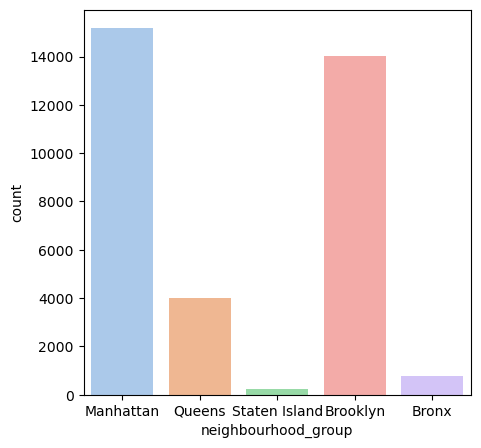

In [20]:
#Plotting distribution of Dataset based on neighbourhood_groups

plt.figure(figsize = (5,5))
sns.countplot(x='neighbourhood_group', data=df, palette = 'pastel')
plt.show()

**From the above graph it can be seen that Manhattan has most number of properties followed by Brooklyn, whereas Staten islan has least number of properties.**

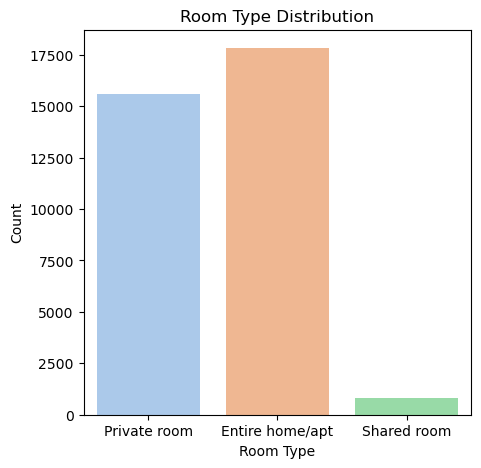

In [21]:
#Plotting distribution of Dataset based on room_type

plt.figure(figsize = (5,5))
sns.countplot(x='room_type', data=df, palette = 'pastel')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Room Type Distribution')
plt.show()

**From the above graph it can be observed that most of the properties rented are of 'Entire Home/Apt Room type'**

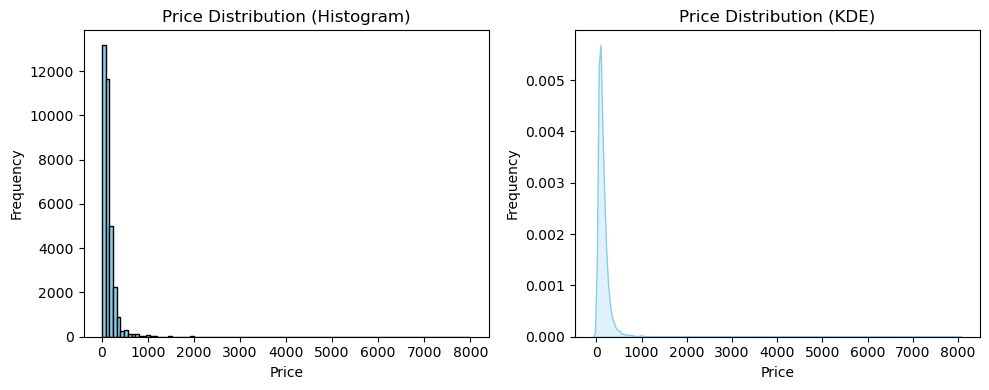

In [22]:
#Plotting Price distribution across the dataset

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram on the first subplot
axes[0].hist(df['price'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution (Histogram)')

# Plot KDE plot on the second subplot
sns.kdeplot(df['price'], fill=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Price Distribution (KDE)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**From the above graphs it can be observed that for lower price frequency of properties is high and tends to decrease as the price increases**

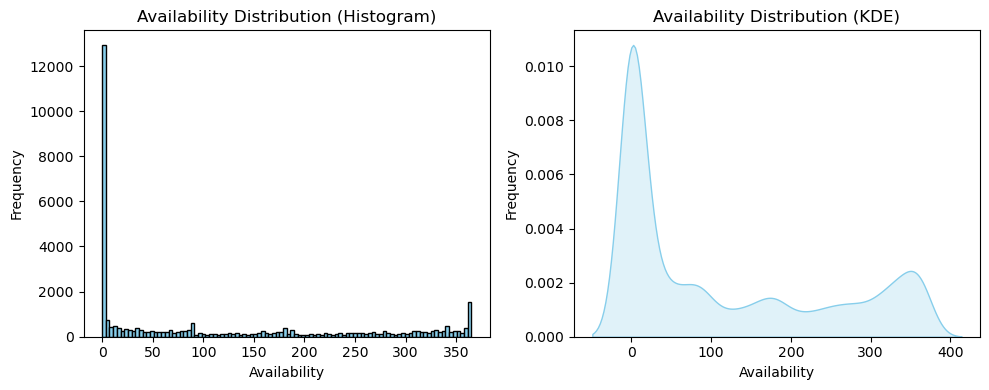

In [23]:
#Distribution of property as per availability

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram on the first subplot
axes[0].hist(df['availability_365'], bins=100, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Availability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Availability Distribution (Histogram)')

# Plot KDE plot on the second subplot
sns.kdeplot(df['availability_365'], fill=True, color='skyblue', ax=axes[1])
axes[1].set_xlabel('Availability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Availability Distribution (KDE)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

**From the above graphs it can be observed that majority of properties are unavailable for renting hence a peak in the curve can be seen at 0.** 

**Bivariate Analysis**  
**1.Price vs Minimum Nights**  
**2.Neighbourhood group and Room Type**

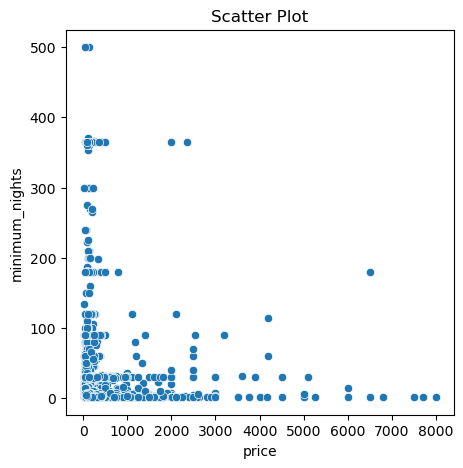

In [24]:
#Plotting Price vs Minimum NIghts using Scatter Plot

plt.figure(figsize=(5,5))
sns.scatterplot(x='price', y='minimum_nights', data=df)
plt.title('Scatter Plot')
plt.xlabel('price')
plt.ylabel('minimum_nights')
plt.show()

**From the above scatter plot it can be observed that graph is concentrated for minimum number of nights = 0 and price = 0. Thus it can be considered that majority of the properties are unavailable for renting**

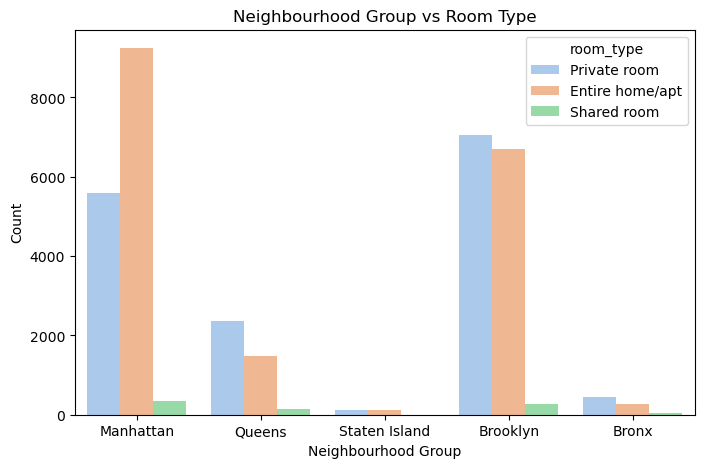

In [25]:
#Plotting Neighbourhood Group Vs Room Type using CountPlot

plt.figure(figsize=(8,5))
sns.countplot(x='neighbourhood_group', hue='room_type', data=df, palette = 'pastel')
plt.title('Neighbourhood Group vs Room Type')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.show()

**From the above graph we can observe that Manhattan has more properties out of which majority of the properties are Entire 
hometype, followed by Brooklyn where majority of the property are Private rooms.**

# Data Transformation through Feature Engineering

In [26]:
#Finding Dataype of each column

df.dtypes

id                                  int64
name                               object
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [27]:
#Finding number of unique values in each column

df.nunique()

id                                34208
name                              33636
host_name                          9287
neighbourhood_group                   5
neighbourhood                       217
latitude                          16413
longitude                         12889
room_type                             3
price                               617
minimum_nights                       88
number_of_reviews                   367
reviews_per_month                   882
calculated_host_listings_count       47
availability_365                    366
dtype: int64

**From the above observation neighbour_hood_group and room_type can be considered to be columns of categorical type and can be encoded**

In [28]:
#Using One Hot Encoding for neighbourhood group and room type

df = pd.get_dummies(df,columns=['neighbourhood_group','room_type'])


In [29]:
df.head(5)

,id,name,host_name,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,5728806,Large private room in Nolita,Nat,Nolita,40.72217,-73.99481,120,7,3,0.06,3,0,False,False,True,False,False,False,True,False
1,2243769,Super Bowl New York City Apartment,Brian,Upper West Side,40.80020,-73.96045,1500,1,0,0.00,1,0,False,False,True,False,False,True,False,False
2,35515415,COZY APT CLOSE TO LGA & JFK AND TRANSPORTATION,Jenny,East Elmhurst,40.75558,-73.89316,200,2,4,4.00,1,365,False,False,False,True,False,True,False,False
3,36202006,Stream-Pressed Paradise (Laundry Room Setup),Rita,Concord,40.60110,-74.07830,30,2,0,0.00,4,82,False,False,False,False,True,False,False,True
4,3780951,Charming Harlem apartment,Gina,Harlem,40.81022,-73.94266,115,1,16,0.27,1,365,False,False,True,False,False,False,False,True


In [30]:
#Dropping unnecesary columns from the database

df.drop(['id','name','host_name','neighbourhood'],axis=1,inplace=True)

In [31]:
df.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.72217,-73.99481,120,7,3,0.06,3,0,False,False,True,False,False,False,True,False
1,40.80020,-73.96045,1500,1,0,0.00,1,0,False,False,True,False,False,True,False,False
2,40.75558,-73.89316,200,2,4,4.00,1,365,False,False,False,True,False,True,False,False
3,40.60110,-74.07830,30,2,0,0.00,4,82,False,False,False,False,True,False,False,True
4,40.81022,-73.94266,115,1,16,0.27,1,365,False,False,True,False,False,False,False,True


# Model Building

In [32]:
#Seperating the Dependent and Independent Columns

x = df.drop('price', axis=1)  #-------->Dataframe with independent columns
y = df['price']   #-------->Dataframe with dependent column/target column

In [33]:
#Using the Train Test Split method from Scikit Learn to Train and Test our Model

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0)

# Using Linear Regression Model for Training and Testing the Data

In [34]:
#Importing Linear Regression from Sklearn and training the model

from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(x_train,y_train)

LinearRegression()

In [35]:
#Predicting the Sales from the Independent Columns dataframe

y_pred = linear.predict(x_test)

In [36]:
#Checking the mean absolute error

from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test,y_pred)

72.33818088232123

# Using XGBoost Model for Training and Testing the Data

In [37]:
#Importing XGBoost from XGBRegressor

from xgboost import XGBRegressor 

xgb = XGBRegressor()

In [38]:
#Training and Testing the XGBoost Model

xgb.fit(x_train,y_train)

y_pred_2 = xgb.predict(x_test)

In [39]:
mean_absolute_error(y_test,y_pred_2)

66.65009717347284

**From the above results it can be observed that the XGBoost model gives less error as compared to the Linear Regression Model. Thus XGBoost Model is more efficient than the Linear Regression Model for this use case** 